#Install Packages

In [344]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Packages

In [367]:
import re 
import pandas as pd
import numpy as np
import time

import tensorflow as tf
import tensorflowjs as tfjs
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import load_model

In [368]:
print(tf.__version__)

2.12.0


In [369]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Data

## Symptoms

In [370]:
symptoms = pd.read_csv('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/dataset.csv')
symptoms.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
symptoms.shape

(4920, 18)

In [372]:
# Null values
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [373]:
# Count duplicated data
symptoms.duplicated().sum()

4616

## Symptom Severity

In [374]:
severity = pd.read_csv('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/Symptom-severity.csv')
severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


## Disease Description

In [375]:
description = pd.read_csv('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/symptom_Description.csv')
description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


## Disease Precaution

In [376]:
precaution = pd.read_csv('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/symptom_precaution.csv')
precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


# Data Cleaning

In [377]:
# Mengganti spaces dengan "_" dan menghapus spaces di bagian kiri kanan string
def substitute_spaces(string):
  if isinstance(string, str):
    string = string.strip()
    #string = re.sub(" ","_",string)
  return string

In [378]:
for cols in symptoms.columns:
  symptoms[cols] = symptoms[cols].apply(substitute_spaces)
for cols in severity.columns:
  severity[cols] = severity[cols].apply(substitute_spaces)
for cols in description.columns:
  description[cols] = description[cols].apply(substitute_spaces)
for cols in precaution.columns:
  precaution[cols] = precaution[cols].apply(substitute_spaces)

In [379]:
description.loc[description['Disease'] == 'Dimorphic hemorrhoids(piles)', 'Disease'] = 'Dimorphic hemorrhoids (piles)'
symptoms.loc[symptoms['Disease'] == 'Dimorphic hemmorhoids(piles)', 'Disease'] = 'Dimorphic hemorrhoids (piles)'
precaution.loc[precaution['Disease'] == 'Dimorphic hemmorhoids(piles)', 'Disease'] = 'Dimorphic hemorrhoids (piles)'

## Combination Data

In [380]:
combination = pd.merge(description, precaution, on='Disease')

In [381]:
combination['Precaution'] = combination['Precaution_1'].fillna('') + ', ' + combination['Precaution_2'].fillna('') + ', ' + combination['Precaution_3'].fillna('') + ', ' + combination['Precaution_4'].fillna('')

In [382]:
combination = combination.drop(['Precaution_1','Precaution_2','Precaution_3','Precaution_4'], axis=1)

In [383]:
combination['id'] = combination.index

In [384]:
combination = combination[['id', 'Disease', 'Description', 'Precaution']]

In [385]:
combination.shape

(41, 4)

#Data Preprocessing

In [386]:
# Matching with symptoms data in severity
def matched_data(values):
  values = severity.loc[severity['Symptom'] == values]['weight']
  if len(values) > 0:
    return values.iloc[0]  # Return the first matching value
  else:
    return 0

In [387]:
cols = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 
        'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 
        'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 
        'Symptom_16', 'Symptom_17']

for i in cols:
  symptoms[i] = symptoms[i].apply(matched_data)

In [388]:
# Matching with symptoms data in description
def label_encoding(values):
  for i in combination.index:
    if values == combination['Disease'].iloc[i]:
      values = i
  return values

In [389]:
symptoms['Disease'] = symptoms['Disease'].apply(label_encoding)

In [390]:
symptoms

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,27,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,27,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,9,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,11,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,21,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,4,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [391]:
symptoms['Disease'].value_counts()

27    120
28    120
33    120
31    120
40    120
17    120
37    120
16    120
36    120
22    120
3     120
20    120
10    120
8     120
38    120
9     120
11    120
21    120
4     120
35    120
26    120
2     120
7     120
5     120
6     120
0     120
15    120
23    120
12    120
39    120
30    120
14    120
29    120
19    120
24    120
32    120
1     120
18    120
34    120
25    120
13    120
Name: Disease, dtype: int64

In [392]:
X = symptoms.drop(['Disease'], axis = 1)
y = symptoms['Disease']

# Neural Networks with TensorFlow 

##Single Validation

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3936, 17) (3936,) (984, 17) (984,)


In [169]:
X_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4381,2,4,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0
3744,5,3,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1340,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0
3570,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
2373,4,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4588,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3312,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
948,7,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
tf.random.set_seed(123)
num_labels = 41

# Define your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [166]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1800      
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 41)                2665      
                                                                 
Total params: 10,929
Trainable params: 10,929
Non-trainable params: 0
_________________________________________________________________


In [167]:
# Train the model

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

Epoch 1/200
123/123 [==============================] - 1s 4ms/step - loss: 2.5499 - accuracy: 0.3326 - val_loss: 1.5967 - val_accuracy: 0.6230
Epoch 2/200
123/123 [==============================] - 0s 3ms/step - loss: 1.2074 - accuracy: 0.7177 - val_loss: 0.9855 - val_accuracy: 0.7551
Epoch 3/200
123/123 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.8115 - val_loss: 0.7019 - val_accuracy: 0.8333
Epoch 4/200
123/123 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8626 - val_loss: 0.5476 - val_accuracy: 0.8841
Epoch 5/200
123/123 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8852 - val_loss: 0.4607 - val_accuracy: 0.9014
Epoch 6/200
123/123 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.9032 - val_loss: 0.3711 - val_accuracy: 0.9035
Epoch 7/200
123/123 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.9169 - val_loss: 0.3355 - val_accuracy: 0.9167

<Axes: title={'center': 'Accuracy'}>

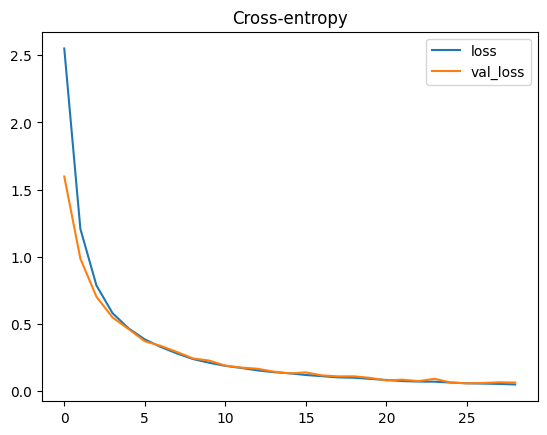

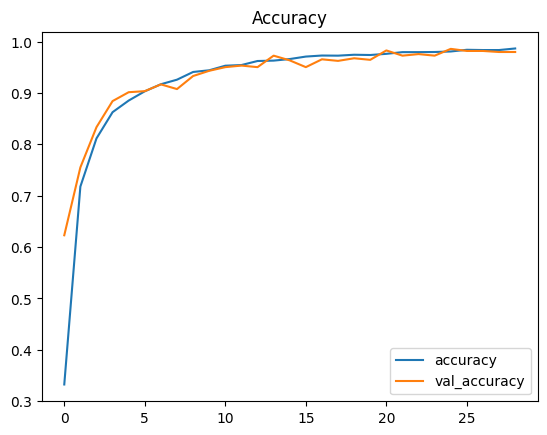

In [168]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [204]:
z = model.predict(X_test)
z

31/31 [==============================] - 0s 2ms/step


array([[9.6683325e-06, 1.3478432e-17, 3.2655692e-12, ..., 9.9962145e-01,
        1.6591368e-07, 8.8917172e-12],
       [2.8320876e-10, 2.3703303e-11, 1.9334164e-03, ..., 1.1872539e-03,
        1.0018186e-03, 8.1339246e-09],
       [1.3379917e-13, 9.4563166e-09, 5.6873268e-14, ..., 2.0139051e-15,
        1.5593629e-15, 8.2700626e-07],
       ...,
       [8.3371732e-14, 1.8462657e-11, 4.6725591e-21, ..., 1.1859968e-19,
        2.5800805e-19, 1.1520304e-10],
       [1.7038666e-14, 2.1035188e-16, 4.9444600e-03, ..., 5.3717173e-09,
        1.0733533e-05, 3.2686412e-10],
       [1.4106052e-11, 4.0462536e-10, 7.1466854e-21, ..., 1.8909708e-19,
        2.4106063e-16, 1.9879176e-08]], dtype=float32)

In [202]:
X_test.iloc[0]

Symptom_1     2
Symptom_2     4
Symptom_3     5
Symptom_4     5
Symptom_5     2
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
Name: 4381, dtype: int64

In [172]:
predicted_classes = np.argmax(z, axis=1)

In [205]:
predicted_classes

array([38, 24, 29,  6, 20, 39,  6, 19, 20,  6, 18,  4,  6, 24,  9, 12, 34,
       26, 14, 10,  5,  9,  7, 34,  8, 37, 39, 25, 26, 10, 30, 35, 34, 23,
       40, 21, 25, 20, 19, 15, 30,  7, 39, 10, 13, 38,  8, 23,  6, 24, 36,
        6, 16, 13, 17, 26,  6, 26, 16, 32,  5, 22,  3, 18, 26, 30, 28,  1,
       17, 20, 39, 29, 20, 35,  6, 26, 30, 27, 31, 25, 29, 18, 13, 11, 24,
        0,  9, 34, 17, 20, 27, 25, 30, 26, 17, 24, 19, 34, 28, 15, 16, 30,
       12, 14,  7, 30, 28, 35, 31, 17,  0, 29,  0, 38, 39, 33, 32, 34, 29,
       21, 10, 18, 10, 23, 24, 32, 31,  8, 35, 33, 10, 22, 37, 36, 17, 37,
       40,  8, 26, 27, 21,  4, 40,  6, 33, 33,  7,  3,  1, 39,  4, 22, 31,
       29, 16,  7,  6, 32, 31, 39, 40,  9, 33, 40, 25, 14, 18, 35, 20,  7,
        6,  1, 10, 30,  7,  5, 12, 12, 36,  5, 21, 25, 19,  9,  1,  2, 25,
       24,  7, 35, 11, 35, 20, 29, 39, 37, 19, 22,  6, 36, 23, 11, 30, 28,
        9, 27,  5, 35, 26, 34, 16, 29,  0, 15, 11,  4, 12, 22,  2, 24,  7,
       23, 10, 34, 30, 23

##StratifiedKFold

In [ ]:
# Define your model architecture
tf.random.set_seed(123)
num_labels = 41

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

# Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1800      
                                                                 
 dense_19 (Dense)            (None, 64)                6464      
                                                                 
 dense_20 (Dense)            (None, 41)                2665      
                                                                 
Total params: 10,929
Trainable params: 10,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Tracking progress
folds = []
model_list = []
exec_time = []
train_accuracy_scores = []
test_accuracy_scores = []
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
)

model_str = 'Neural Network'

print(str(model_str).upper())
print('--------------------')

# Initiate SkF and f1_array
skf = StratifiedKFold(n_splits=10)

# Cross validation
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  # Calculate the starting time
  start_time = time.time()

  # Append the name model and params
  model_list.append(model_str)

  # Print index
  print(f"Fold {i+1}:")
  folds.append(i+1)

  # Filter the index
  X_train_subset = X.iloc[train_index, :]
  X_test_subset = X.iloc[test_index, :]
  y_train_subset = y[train_index]
  y_test_subset = y[test_index]

  # Fit the model
  model.fit(X_train_subset, 
            y_train_subset, 
            epochs=200, 
            batch_size=32, 
            validation_data=(X_test_subset, y_test_subset),
            verbose = 0,
            callbacks=[early_stopping])

  # Predict
  y_pred_train = model.predict(X_train_subset)
  y_pred_test = model.predict(X_test_subset)

  # Calculate the f1 score
  loss_train, accuracy_train = model.evaluate(X_train_subset, y_train_subset, batch_size=32)
  loss_test, accuracy_test = model.evaluate(X_test_subset, y_test_subset, batch_size=32)
  print(f"Train loss: {loss_train}")
  print(f"Train accuracy: {accuracy_train}")
  print(f"Validation loss: {loss_test}")
  print(f"Validation accuracy: {accuracy_test}")
  train_accuracy_scores.append(accuracy_train)
  test_accuracy_scores.append(accuracy_test)
    
  # Calculate the end time
  end_time = time.time() - start_time
  exec_time.append(end_time)
  print('')

# Cetak rerata dan mediannya
print('Rerata Accuracy Training CV:', np.mean(train_accuracy_scores))
print('Rerata Accuracy Test CV:', np.mean(test_accuracy_scores))

# Buat DataFrame
dict_df = {'Model': model_list,
            'Fold': folds,
            'Training Time': exec_time,
            'Train Accuracy': train_accuracy_scores,
            'Test Accuracy': test_accuracy_scores}

# Combine dataframe
nn_df = pd.DataFrame(dict_df)

NEURAL NETWORK
--------------------
Fold 1:
Epoch 49: early stopping
16/16 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9837
Train loss: 0.02371872216463089
Train accuracy: 0.9923216104507446
Validation loss: 0.045651305466890335
Validation accuracy: 0.9837398529052734

Fold 2:
Epoch 4: early stopping
16/16 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9878
Train loss: 0.018373388797044754
Train accuracy: 0.9932249188423157
Validation loss: 0.03573574498295784
Validation accuracy: 0.9878048896789551

Fold 3:
Epoch 4: early stopping
16/16 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9654
Train loss: 0.024269163608551025
Train accuracy: 0.9875790476799011
Validation loss: 0.07368311285972595
Validation accuracy: 0.9654471278190613

Fold 4:
Epoch 16: early stopping
16/16 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9837
Train loss: 0.01488728728145361
Train accuracy: 

## Model Fit with All Data

In [393]:
tf.random.set_seed(123)
num_labels = 41

# Define your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [394]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1800      
                                                                 
 dense_10 (Dense)            (None, 64)                6464      
                                                                 
 dense_11 (Dense)            (None, 41)                2665      
                                                                 
Total params: 10,929
Trainable params: 10,929
Non-trainable params: 0
_________________________________________________________________


In [395]:
# Train the model

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=3,
    verbose=1,
)

model.fit(X, y, epochs=200, batch_size=32, callbacks=[early_stopping])

Epoch 1/200
154/154 [==============================] - 1s 2ms/step - loss: 2.4455 - accuracy: 0.4037
Epoch 2/200
154/154 [==============================] - 0s 2ms/step - loss: 1.0311 - accuracy: 0.7652
Epoch 3/200
154/154 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.8476
Epoch 4/200
154/154 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.8898
Epoch 5/200
154/154 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.9134
Epoch 6/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 0.9224
Epoch 7/200
154/154 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9376
Epoch 8/200
154/154 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.9482
Epoch 9/200
154/154 [==============================] - 0s 3ms/step - loss: 0.1622 - accuracy: 0.9565
Epoch 10/200
154/154 [==============================] - 0s 3ms/step - loss: 0.1399 - accura

In [400]:
input = np.array([[1,2,3,4,5,0,0,0,0,0,0,0,0,0,0,0,0]])
predict = model.predict(input)
predict = np.argmax(predict, axis=1)

1/1 [==============================] - 0s 21ms/step


In [406]:
combination[combination['id']==predict.item()]

,id,Disease,Description,Precaution
5,5,GERD,"Gastroesophageal reflux disease, or GERD, is a...","avoid fatty spicy food, avoid lying down after..."


## Deploy Model

In [409]:
model.save('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/DeployModel/model.h5')

In [410]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/DeployModel/model.h5 /content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/DeployModel/

2023-06-03 07:44:23.183742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [411]:
import csv
import json
 
 
# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
     
    # create a dictionary
    data = {}
     
    # Open a csv reader called DictReader
    with open(csvFilePath, encoding='utf-8') as csvf:
        csvReader = csv.DictReader(csvf)
         
        # Convert each row into a dictionary
        # and add it to data
        for rows in csvReader:
             
            # Assuming a column named 'Disease' to
            # be the primary key
            key = rows['Symptom']
            data[key] = rows
 
    # Open a json writer, and use the json.dumps()
    # function to dump data
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))
         

In [412]:
# Driver Code
 
# Decide the two file paths according to your
# computer system
csvFilePath = r'Names.csv'
jsonFilePath = r'Names.json'
 
# Call the make_json function
make_json('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/Symptom-severity.csv', 
          '/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/Symptom-severity.json')

In [415]:
import csv
import json
 
 
# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
     
    # create a dictionary
    data = {}
     
    # Open a csv reader called DictReader
    with open(csvFilePath, encoding='utf-8') as csvf:
        csvReader = csv.DictReader(csvf)
         
        # Convert each row into a dictionary
        # and add it to data
        for rows in csvReader:
             
            # Assuming a column named 'Disease' to
            # be the primary key
            key = rows['id']
            data[key] = rows
 
    # Open a json writer, and use the json.dumps()
    # function to dump data
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))

In [416]:
combination.to_csv('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/combination.csv')

In [417]:
make_json('/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/combination.csv', 
          '/content/drive/MyDrive/CapstoneProjectBangkitMachineLearning/Data/combination.json')